<h1>Z-Score For Outlier Removal</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
from scipy import stats

In [2]:
N = 40

##Create Some Data

data = np.random.randn(N)
data[data<-1] = data[data<-1] + 2
data[data>2] = data[data>2] ** 2
data = data*148 + 97

#convert to Z Score

dataZ = (data - np.mean(data))/np.std(data)

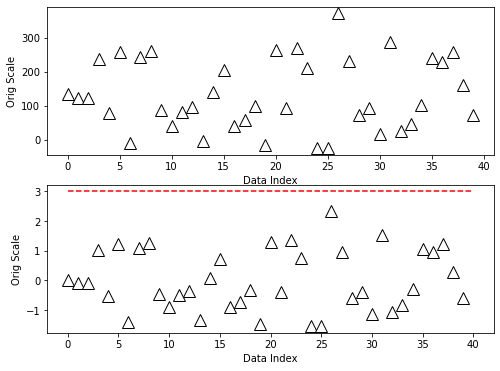

In [3]:
#Specifing the Z Score Threshold To Ignore Outliers

zscorethresh = 3

fig, ax = plt.subplots(2, 1, figsize = (8, 6))

ax[0].plot(data, 'k^', markerfacecolor = 'w', markersize = 12)
ax[0].set_xlabel('Data Index')
ax[0].set_ylabel('Orig Scale')

ax[1].plot(dataZ, 'k^', markerfacecolor = 'w', markersize = 12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_ylabel('Orig Scale')

plt.show()

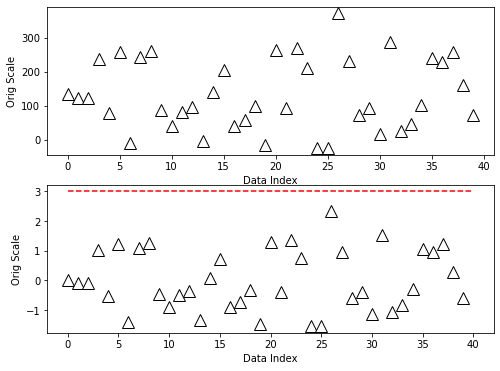

In [4]:
outliers = np.where(np.abs(dataZ) > zscorethresh)[0]

ax[0].plot(outliers,data[outliers],'x',color='red', markersize = 20)
ax[1].plot(outliers, dataZ[outliers],'x', color = 'red', markersize = 20)

fig

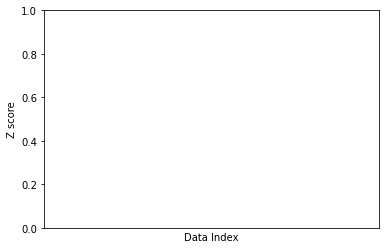

[]


In [5]:
##iterative Method

zscorethresh = 3
numiters = 0
colorz = 'bgrmckyw'

while True:
    datamean = np.nanmean(data)
    datastd = np.nanstd(data)
    dataZ = (data - datamean)/datastd
    
    #finding the data to remove
    toRemove = np.abs(dataZ) > zscorethresh
    
    if sum(toRemove) == 0:
        break

    else:
        plt.plot(np.where(toRemove)[0], dataZ[toRemove], '%sx'%colorz[numiters], markersize=12)
        dataZ[toRemove] = np.nan
    
    plt.plot(dataZ, 'k^',markersize = 12, markerfacecolor = colorz[numiters],label=f"Iteration : {numiters}")
    numiters += 1
    
plt.xticks([])
plt.ylabel('Z score')
plt.xlabel('Data Index')
plt.show()

##remove datapoint which are nan
toBeRemoved = np.where(np.isnan(dataZ))[0]
print(toBeRemoved)

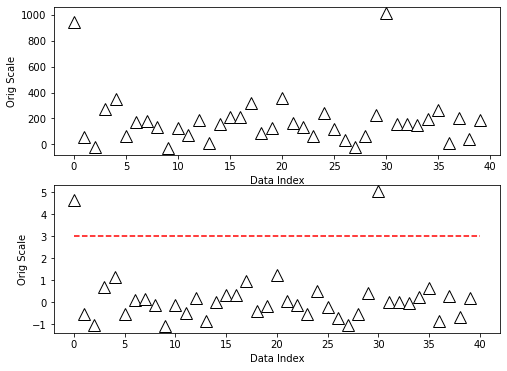

In [6]:
##Modified For Non Normal Distributions

N = 40

##Create Some Data

data = np.random.randn(N)
data[data<-1] = data[data<-1] + 2
data[data>2] = data[data>2] ** 2
data = data*148 + 97

#convert to Z Score

dataZ =  stats.norm.ppf(0.75) * (data - np.median(data))/robust.mad(data)


#Specifing the Z Score Threshold To Ignore Outliers

zscorethresh = 3

fig, ax = plt.subplots(2, 1, figsize = (8, 6))

ax[0].plot(data, 'k^', markerfacecolor = 'w', markersize = 12)
ax[0].set_xlabel('Data Index')
ax[0].set_ylabel('Orig Scale')

ax[1].plot(dataZ, 'k^', markerfacecolor = 'w', markersize = 12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_ylabel('Orig Scale')

plt.show()